In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import sawtooth
from scipy.signal import firwin, lfilter

# Fourier Transform exercises
The Fourier Transform is a powerful mathematical tool used to decompose a signal into its constituent frequencies.  
It allows us to analyze the frequency components present in signals, which is essential in many fields such as engineering, physics, and signal processing.

In this notebook, we will explore the fundamental concepts of the Fourier Transform and apply it to various signals like sine waves and square waves.  
Through a series of exercises, you will learn how to compute the Fourier Transform using Python and visualize the frequency spectra.

Understanding these concepts will help you analyze periodicities and frequency behaviors in real-world data.

# exercise 1. introduction
To begin, we explore how the fourier transform cam compose and decompose a composite signal made from the sum of two sine waves with different frequencies. Using the FFT function we can find the amplitude and phase of the original signal.
This help us understand the frequency content hidden inside complex signals.

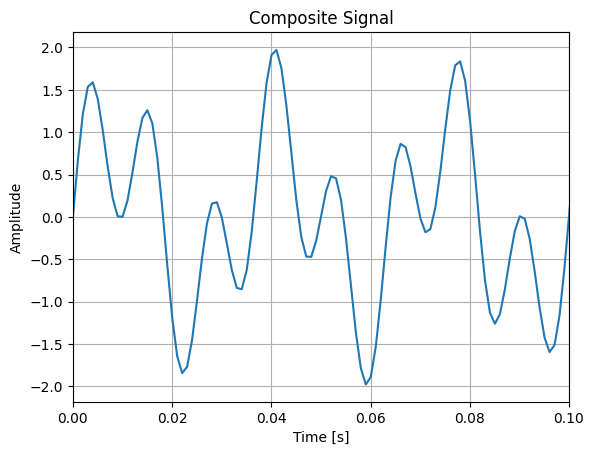

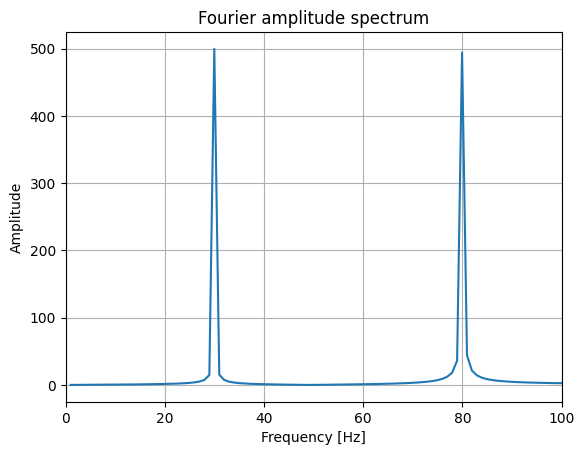

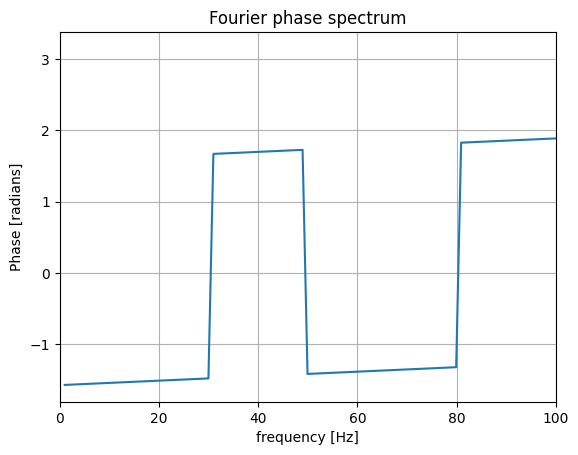

In [ ]:
# Choose the frequencies of the original sine waves
t = np.linspace (0,1,1000)    # Time vector form 0 to 1 second
f1 = 30                       # Frequency of the first sine wave (Hz)
f2 = 80                       # Frequency of the second sine wave (Hz)

# Sum the sin waves to generate a composed signal and plot it
signal = np.sin (2*np.pi* f1 * t)  + np.sin (2* np.pi* f2 * t)
plt.plot (t,signal)
plt.title ('Composite Signal')
plt.xlabel ('Time [s]')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()

# Apply FFT to find the amplitude and frequency of the original signal
amplitude = np.fft.fft (signal)
frequency = np.fft.fftfreq ( len(t), d = (t[1]-t[0]))
phase = np.angle (amplitude)
positive_freq = frequency > 0

# Plot amplitude spectrum
plt.figure()
plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier amplitude spectrum')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,100)
plt.grid()
plt.show()

# Plot phase spectrum
plt.plot (frequency [ positive_freq ], phase [positive_freq])
plt.title ('Fourier phase spectrum')
plt.xlabel ('frequency [Hz]')
plt.ylabel ('Phase [radians]')
plt.xlim (0,100)
plt.grid()
plt.show()

#Exercise 2: Phase shift
In this exercise we see the effect of a phase shift on a signal.
We generate a signal composed of two sine waves with the same frequencies as in the previous exercise, but with a phase shift.
By comparing the time-domain plots, we can see that the wave is shifted horizontally compared to the previous one.
On the other hand, in the frequency domain, the peaks in amplitude remain in the same position, while the phase changes.
This highlights an important property of Fourier Transform: a time shift affects the phase spectrum, but does not affect amplitude one.

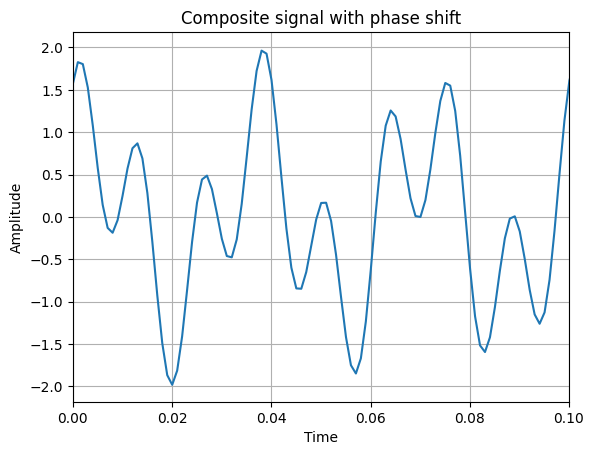

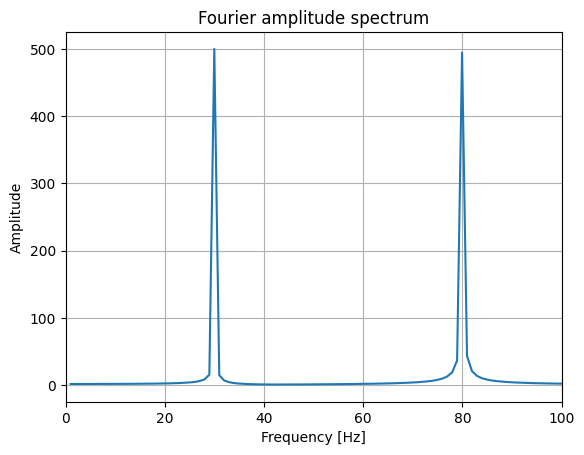

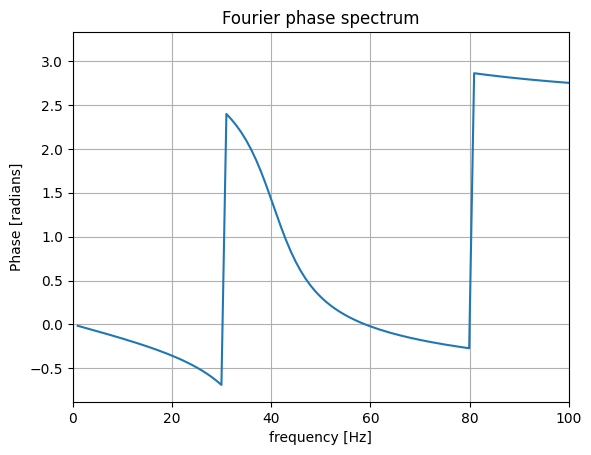

In [ ]:
t = np.linspace (0,1,1000)
f1 = 30
f2 = 80
signal = np.sin (2*np.pi* f1 * t+ np.pi/4) + np.sin (2* np.pi* f2 * t+ np.pi /3)
plt.plot (t,signal)
plt.title ('Composite signal with phase shift')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()

# Apply FFT to find the amplitude and frequency of the original signal
amplitude = np.fft.fft (signal)
frequency = np.fft.fftfreq ( len(t), d = (t[1]-t[0]))
phase = np.angle (amplitude)
positive_freq = frequency > 0

# Plot amplitude spectrum
plt.figure()
plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier amplitude spectrum')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,100)
plt.grid()
plt.show()

# Plot phase spectrum
plt.plot (frequency [ positive_freq ], phase [positive_freq])
plt.title ('Fourier phase spectrum')
plt.xlabel ('frequency [Hz]')
plt.ylabel ('Phase [radians]')
plt.xlim (0,100)
plt.grid()
plt.show()


# Exercise 3: Signal composed by 3 sine waves
We extend our study by adding another component to the signal, which is now composed by three waves: two sine and a cosine wave.
The phase shift introduced by the cosine doesn't affect the amplitude plot, but only the phase one. In the amplitude plot we can find the original frequencies of the signal.

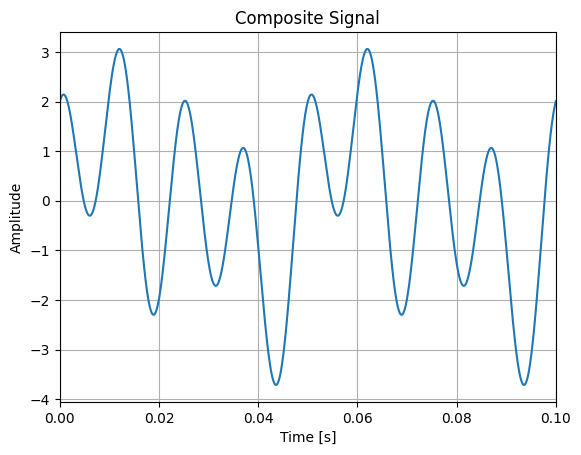

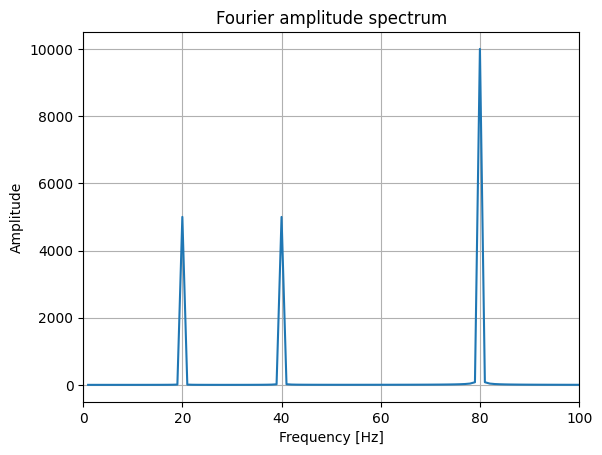

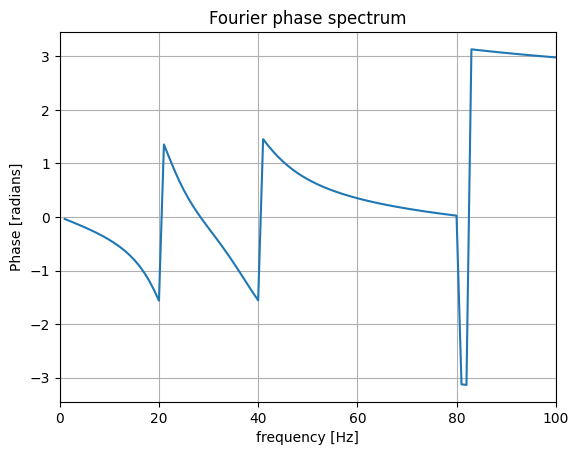

In [ ]:
# Choose the original frequencies and create the composite signal
t = np.linspace (0,1,10000)
f1 = 40
f2 = 80
f3 = 20
signal = np.sin (2*np.pi* f1 * t) + 2*np.cos (2* np.pi* f2 * t) + np.sin (2* np.pi * f3 * t)
plt.plot (t,signal)
plt.title ('Composite Signal')
plt.xlabel ('Time [s]')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()

# Apply FFT to find the amplitude and frequency of the original signal
amplitude = np.fft.fft (signal)
frequency = np.fft.fftfreq ( len(t), d = (t[1]-t[0]))
phase = np.angle (amplitude)
positive_freq = frequency > 0

# Plot amplitude spectrum
plt.figure()
plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier amplitude spectrum')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,100)
plt.grid()
plt.show()

# Plot phase spectrum
plt.plot (frequency [ positive_freq ], phase [positive_freq])
plt.title ('Fourier phase spectrum')
plt.xlabel ('frequency [Hz]')
plt.ylabel ('Phase [radians]')
plt.xlim (0,100)
plt.grid()
plt.show()

# Exercise 4: Normal noise
In the following, we introduce noise into our signal. We generate a composed signal with two sine waves and random noise drawn from a normal distribution between -1 and 1 (noise can be positive or negative).
A **normal distribution** (also called Gaussian distribution) is a bell-shaped probability distribution where values near the mean are more likely to occur than values far from it. In our cas the mean is 0, so the noise is centered around 0.
Noise can be increased or decreased using the parameter fs. fs represents the proportion of the original signal in the noisy signal, while 1-fs is the noise component.
Noise affects the amplitude plot, and as we increase it, it becomes harder to clearly extract the original signals.

It is important to add noise because in real world machines, there is always noise coming from external factors, which affects measures. For this reason, it is essential to get used to seeing noise in plots. Later, we will learn how to use filters that can reduce or remove it.


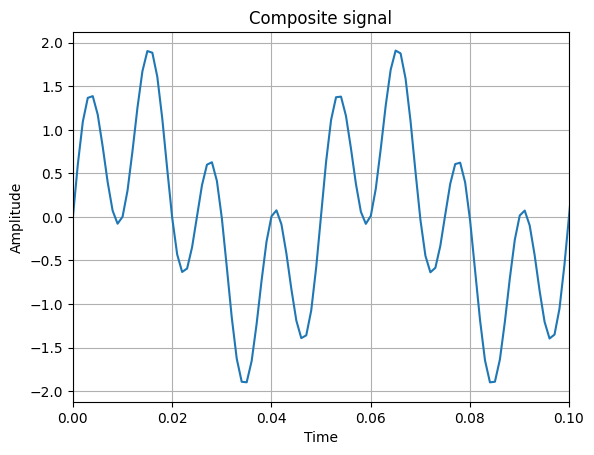

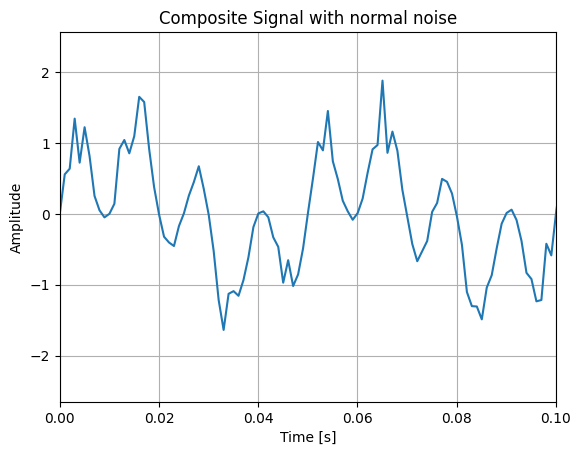

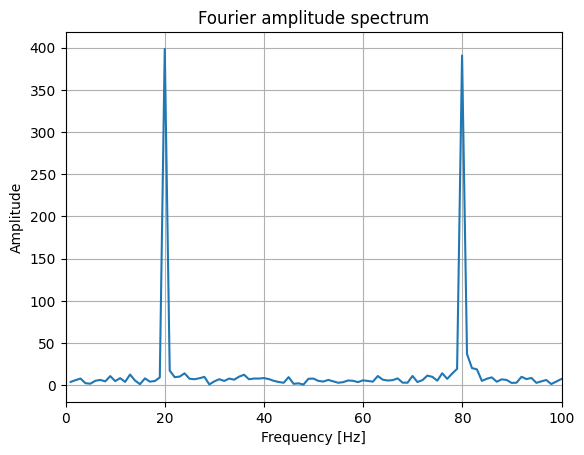

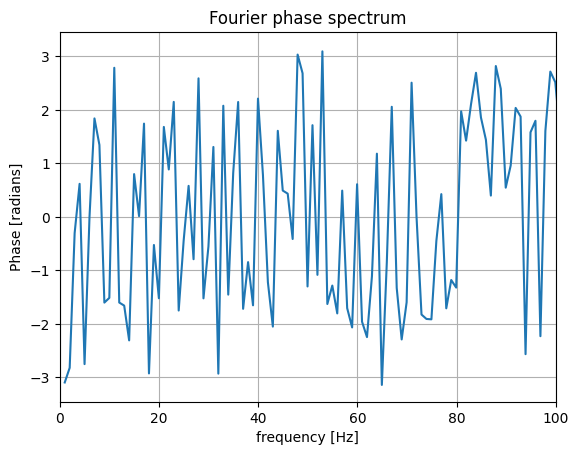

In [ ]:
# Choose the original frequencies and the parameter fs
t = np.linspace (0,1,1000)
f1 = 20
f2 = 80
f3 = 40
fs = 0.8

# Create the noisy signal and plot both
function = (np.sin (2*np.pi* f1 * t)  + np.sin (2* np.pi * f2 * t))
noise = np.random.normal (0,1, size = len(t))
signal = fs*function + (1-fs)* noise * np.abs(function)
plt.plot (t,function)
plt.title ('Composite signal')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()
plt.plot (t,signal)
plt.title ('Composite Signal with normal noise')
plt.xlabel ('Time [s]')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()

# Apply FFT to find the amplitude and frequency of the original signal
amplitude = np.fft.fft (signal)
frequency = np.fft.fftfreq ( len(t), d = (t[1]-t[0]))
phase = np.angle (amplitude)
positive_freq = frequency > 0

# Plot amplitude spectrum
plt.figure()
plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier amplitude spectrum')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,100)
plt.grid()
plt.show()

# Plot phase spectrum
plt.plot (frequency [ positive_freq ], phase [positive_freq])
plt.title ('Fourier phase spectrum')
plt.xlabel ('frequency [Hz]')
plt.ylabel ('Phase [radians]')
plt.xlim (0,100)
plt.grid()
plt.show()

# Exercise 5: Uniform noise
In this example the signal is composed of three sine waves and noise is drawn from a **uniform distribution** between -1 and 1. This means that every values in this range is equally likely to occur.
Moreover the second sine wave has amplitude equal to twice that of the others, so in the amplitude plot we can see that the peak at 80 Hz is double the peak at 20 and 40 Hz.

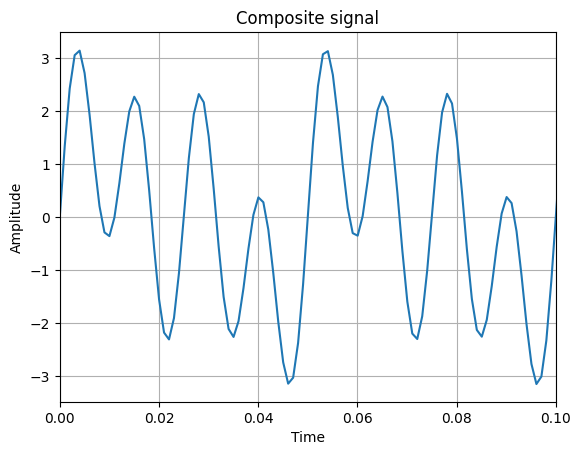

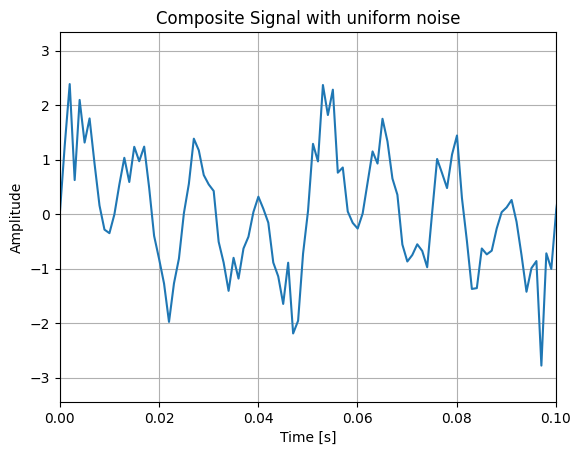

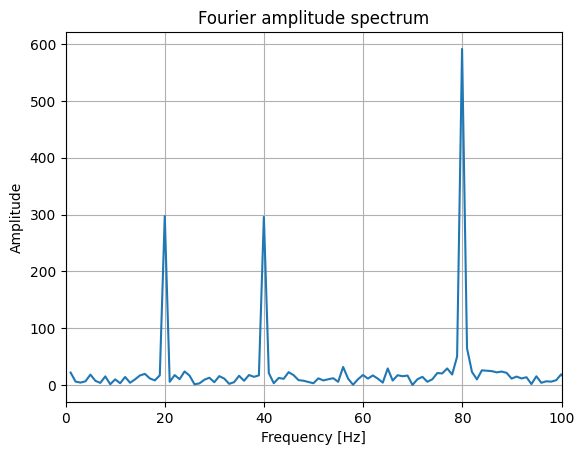

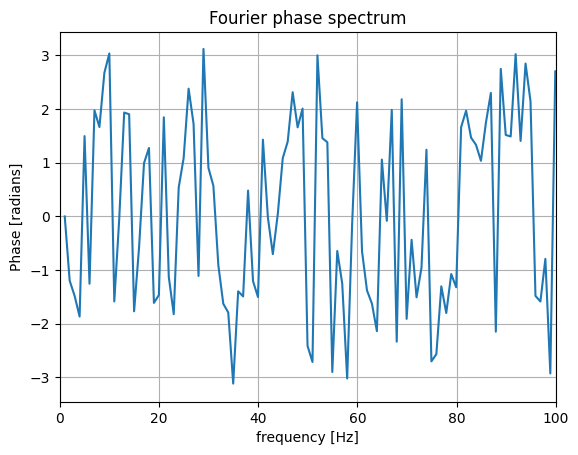

In [ ]:
# Choose the original frequencies and the parameter fs
t = np.linspace (0,1,1000)
f1 = 20
f2 = 80
f3 = 40
fs = 0.6

# Create the noisy signal and plot both
function = np.sin (2*np.pi* f1 * t) + 2*np.sin (2* np.pi* f2 * t) + np.sin (2* np.pi * f3 * t)
noise = np.random.uniform (-1,1, size = len(t))
signal = fs*function + (1-fs)* noise * np.abs(function)
plt.plot (t,function)
plt.title ('Composite signal')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()
plt.plot (t,signal)
plt.title ('Composite Signal with uniform noise')
plt.xlabel ('Time [s]')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()

# Apply FFT to find the amplitude and frequency of the original signal
amplitude = np.fft.fft (signal)
frequency = np.fft.fftfreq ( len(t), d = (t[1]-t[0]))
phase = np.angle (amplitude)
positive_freq = frequency > 0

# Plot amplitude spectrum
plt.figure()
plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier amplitude spectrum')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,100)
plt.grid()
plt.show()

# Plot phase spectrum
plt.plot (frequency [ positive_freq ], phase [positive_freq])
plt.title ('Fourier phase spectrum')
plt.xlabel ('frequency [Hz]')
plt.ylabel ('Phase [radians]')
plt.xlim (0,100)
plt.grid()
plt.show()

#Exercise 6: Square wave
Now we explore a different type of wave: the square wave.
**A square wave** is a function that equals 0 for a portion of its period and equals 1 for the remaining portion. It is a periodic function characterized by two parameters: the frequency and the duty cycle, which is the percentage of the period during which the function equals 1.
In the amplitude spectrum we can see peaks at the odd harmonics of the signal, while all the even harmonics have 0 amplitude. The amplitude of the peaks decrease proportionally to 1/n, where n is the harmonic number.

This harmonic pattern can be explained by the Fourier series of an ideal square wave:
$$
x(t) = \frac{4}{\pi} \sum_{n=1,3,5,\dots}^{\infty} \frac{\sin(2\pi n f_0 t)}{n}
$$
which contains only odd harmonics, with amplitudes decreasing as \(1/n\).

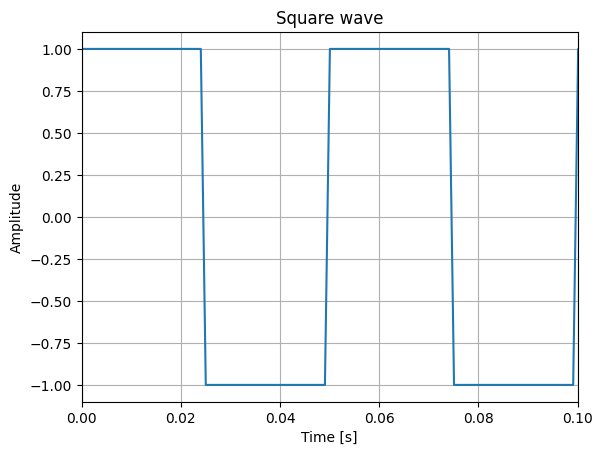

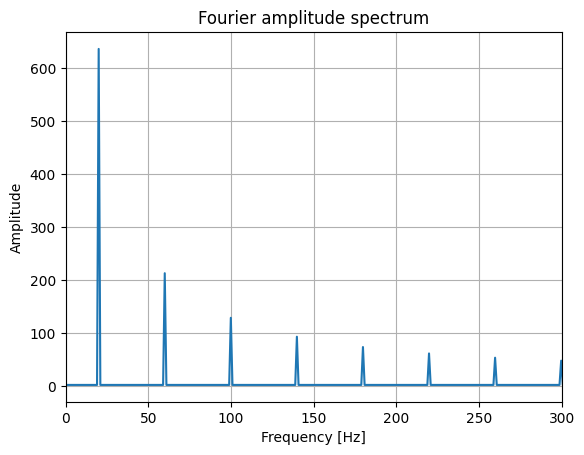

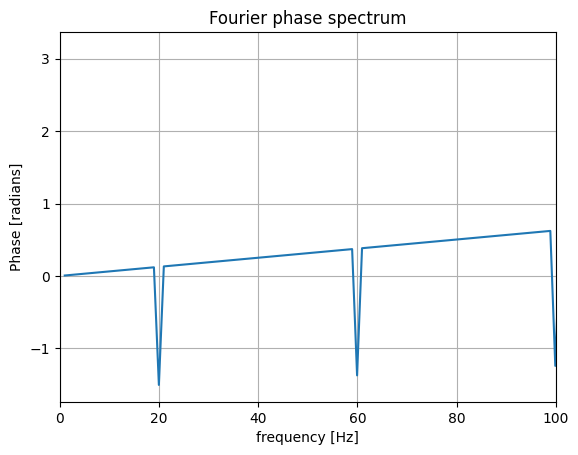

In [ ]:
# Choose the frequency and the duty cycle
from scipy import signal
t = np.linspace (0,1,1000)
f=20
dc = 0.5
signal = signal.square (2*np.pi*f*t, duty = dc)


plt.plot (t,signal)
plt.title ('Square wave')
plt.xlabel ('Time [s]')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()

# Apply FFT to find the amplitude and frequency of the original signal
amplitude = np.fft.fft (signal)
frequency = np.fft.fftfreq ( len(t), d = (t[1]-t[0]))
phase = np.angle (amplitude)
positive_freq = frequency > 0

# Plot amplitude spectrum
plt.figure()
plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier amplitude spectrum')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,300)
plt.grid()
plt.show()

# Plot phase spectrum
plt.plot (frequency [ positive_freq ], phase [positive_freq])
plt.title ('Fourier phase spectrum')
plt.xlabel ('frequency [Hz]')
plt.ylabel ('Phase [radians]')
plt.xlim (0,100)
plt.grid()
plt.show()

# Exercise 7: Triangular wave
In this exercise we continue exploring functions and introduce the triangular wave.
In the time domain the **triangular wave** is a triangular-shaped function defined by:
- \( y = x \) if \( 0 < x < T/2 \)  
- \( y = -x \) if \( T/2 < x < T \)

In the frequency domain the triangular wave shows peaks at the odd harmonics and decreases proportionally to 1/(n^2), so more rapidly than the decrease observed in the square wave.

he harmonic structure of the triangular wave can be explained by its Fourier series:  

$$
x(t) = \frac{8}{\pi^2} \sum_{n=1,3,5,\dots}^{\infty} \frac{(-1)^{\frac{n-1}{2}}}{n^2} \sin(2 \pi n f_0 t)
$$

This series contains only odd harmonics, and the amplitudes decrease proportionally to \(1/n^2\), explaining the faster decay compared to the square wave.

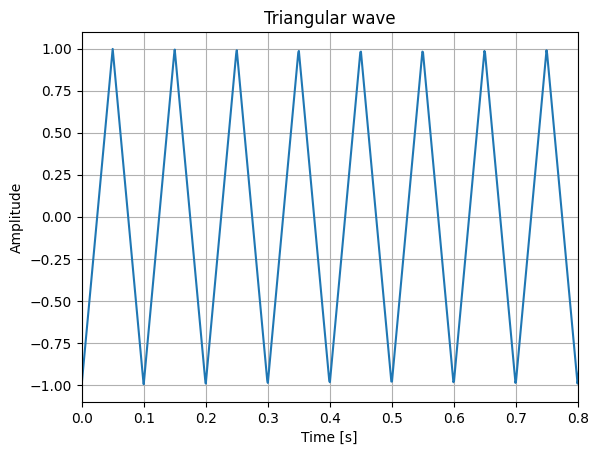

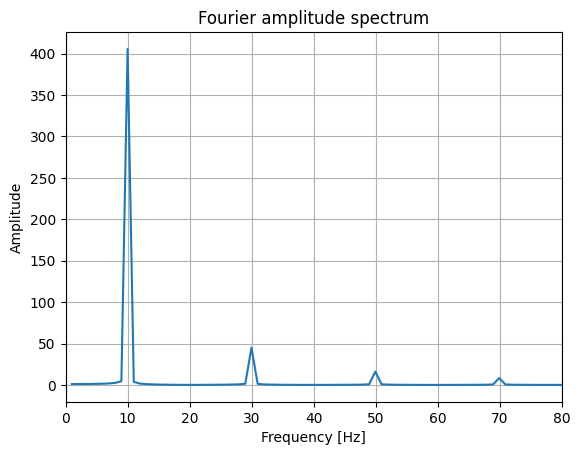

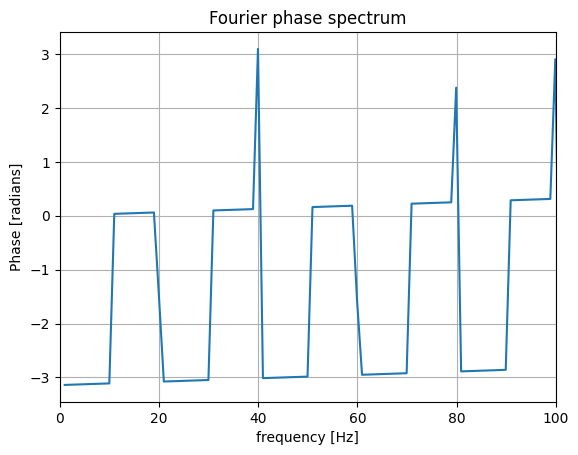

In [ ]:
t = np.linspace (0,1,1000)
f=10
signal = sawtooth (2*np.pi*f*t, width = 0.5)

# Plot the triangular wave in time domain
plt.plot (t,signal)
plt.title ('Triangular wave')
plt.xlabel ('Time [s]')
plt.ylabel ('Amplitude')
plt.xlim (0,0.8)
plt.grid()
plt.show()

# Apply FFT to find the amplitude and frequency of the original signal
amplitude = np.fft.fft (signal)
frequency = np.fft.fftfreq ( len(t), d = (t[1]-t[0]))
phase = np.angle (amplitude)
positive_freq = frequency > 0

# Plot amplitude spectrum
plt.figure()
plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier amplitude spectrum')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,80)
plt.grid()
plt.show()

# Plot phase spectrum
plt.plot (frequency [ positive_freq ], phase [positive_freq])
plt.title ('Fourier phase spectrum')
plt.xlabel ('frequency [Hz]')
plt.ylabel ('Phase [radians]')
plt.xlim (0,100)
plt.grid()
plt.show()

# Exercise 8: Sawtooth wave
We proceed by adding a new function: the sawtooth wave.  
A **sawtooth wave** is a periodic waveform that rises linearly over time and then sharply drops. It is characterized by a linear increase over the period followed by an abrupt reset to the starting value.  
It is defined by:
- \( y = x \) if \( 0 < x < T/2 \)  
- \( y = -x \) if \( T/2 < x < T \)

In the time domain, the sawtooth wave looks like a ramp that repeats continuously.  
In the frequency domain, it contains all integer harmonics (both even and odd), with amplitudes decreasing proportionally to 1/n.  
This results in a richer harmonic content compared to the square and triangular waves.

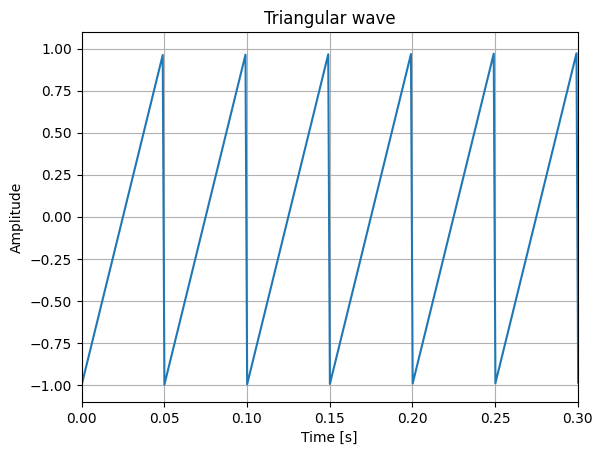

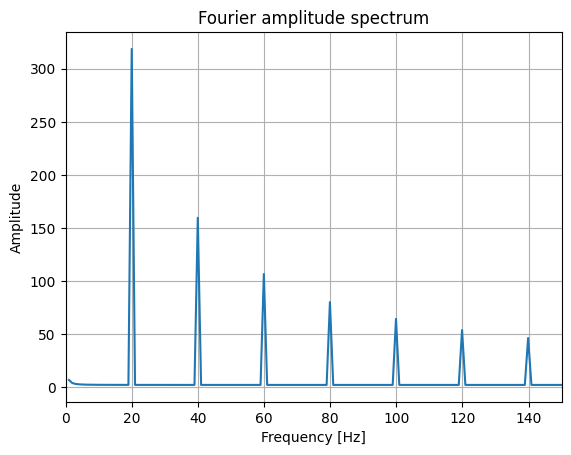

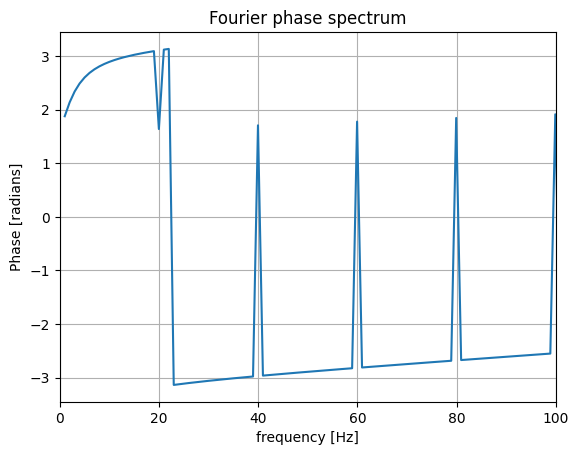

In [ ]:
t = np.linspace (0,1,1000)
f=20
signal = sawtooth (2*np.pi*f*t)


# Plot the triangular wave in time domain
plt.plot (t,signal)
plt.title ('Triangular wave')
plt.xlabel ('Time [s]')
plt.ylabel ('Amplitude')
plt.xlim (0,0.3)
plt.grid()
plt.show()

# Apply FFT to find the amplitude and frequency of the original signal
amplitude = np.fft.fft (signal)
frequency = np.fft.fftfreq ( len(t), d = (t[1]-t[0]))
phase = np.angle (amplitude)
positive_freq = frequency > 0

# Plot amplitude spectrum
plt.figure()
plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier amplitude spectrum')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,150)
plt.grid()
plt.show()

# Plot phase spectrum
plt.plot (frequency [ positive_freq ], phase [positive_freq])
plt.title ('Fourier phase spectrum')
plt.xlabel ('frequency [Hz]')
plt.ylabel ('Phase [radians]')
plt.xlim (0,100)
plt.grid()
plt.show()

#Exercise 9: Square wave with noise
This time, we introduce noise into the square wave signal.
The noise is drawn from a uniform distribution between -1 and 1. We can regulate the noise level using the parameter f1, which represent the percentage of noise in the signal. We can compare the signal plots with and without noise along with their amplitude spectrum. In the frequency domain, we can see the odd harmonics with aamplitudes decreasing proportionally to \(1/n\), while noise add random components between the peaks.

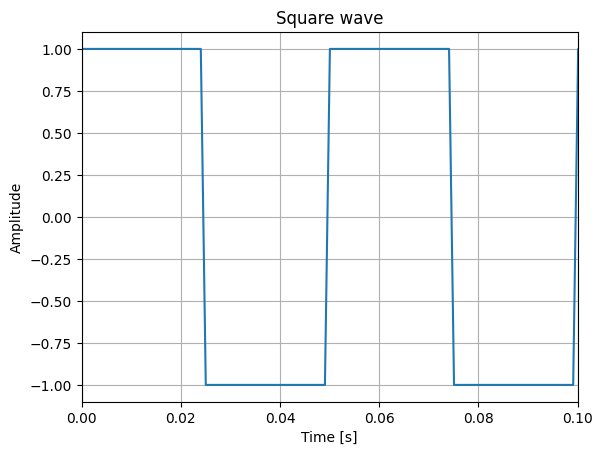

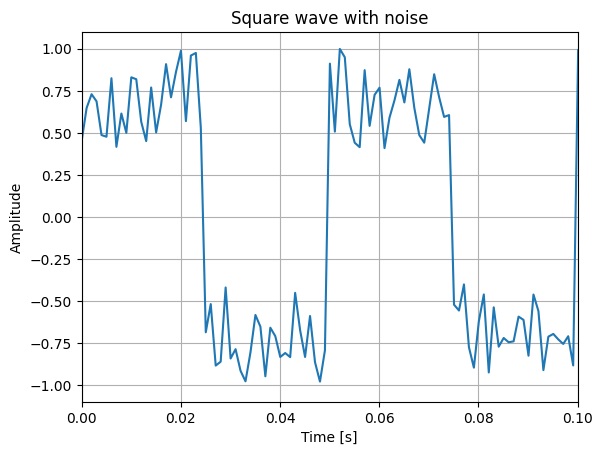

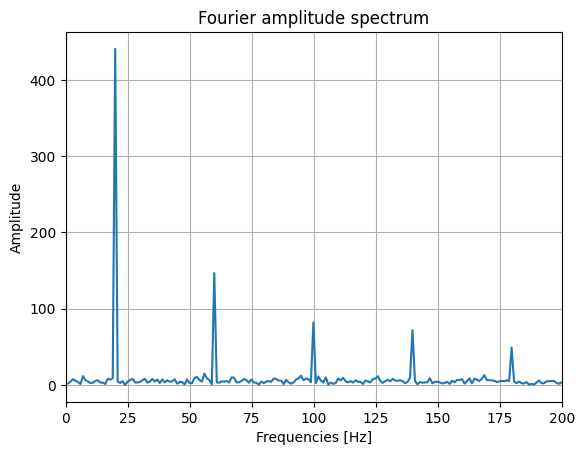

In [ ]:
from scipy import signal
t = np.linspace (0,1,1000)
f=20
f1 = 0.3
square_wave = signal.square (2*np.pi*f*t, duty = 0.5)       # onda quadra
noise = np.random.uniform (-1,1, size = len (t))
square_wave_noisy = (1-f1)*square_wave + (f1) *noise * np.abs(square_wave)

# Square wave plot with and without noise
plt.plot (t,square_wave)
plt.title ('Square wave')
plt.xlabel ('Time [s]')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()
plt.figure()
plt.plot (t,square_wave_noisy)
plt.title ('Square wave with noise')
plt.xlabel ('Time [s]')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()

# Apply FFT to find the amplitude and frequency of the original signal
amplitude = np.fft.fft(square_wave_noisy)
frequency = np.fft.fftfreq(len(t), d =( t[1] - t[0] ))
positive_freq = frequency > 0
phase = np.angle (amplitude)

# Amplitude spectrum plot
plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier amplitude spectrum')
plt.xlabel ('Frequencies [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,200)
plt.grid()
plt.show()            #


#Exercise 10: Triangular wave with noise
Here, we introduce noise into the triangulare wave. The noise is normally distributed with mean 0 and standard deviation 1.
In the frequency domain the peaks amplitude decrease very quickly, so starting from the third odd harmonics it becomes hard to distinguish peaks between the noise. If we increase the noise level, even the second harmonic become difficult to find.

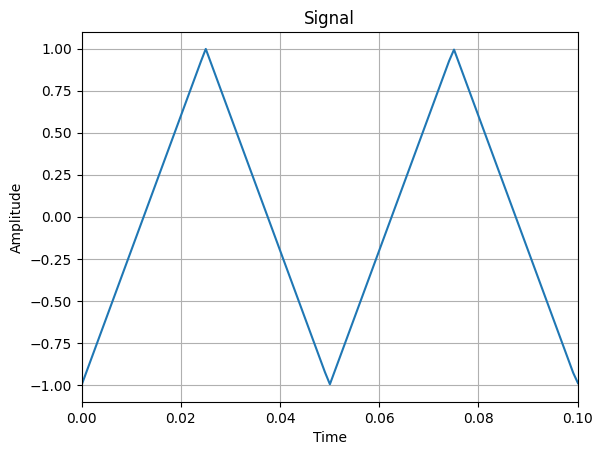

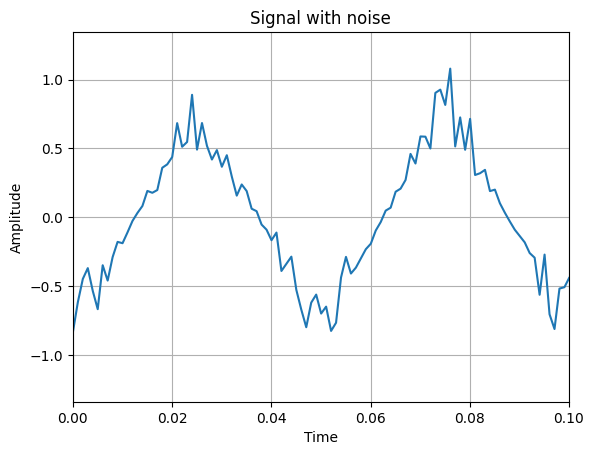

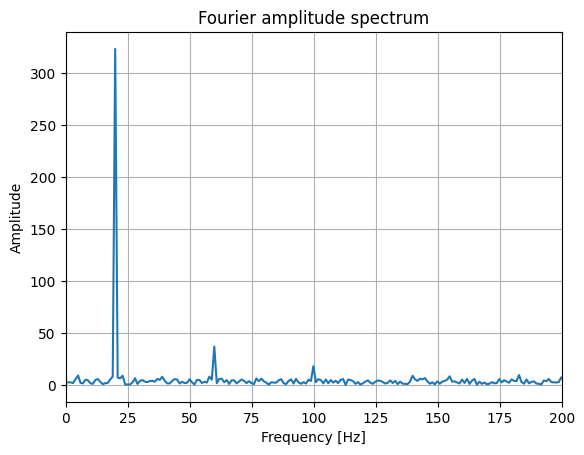

In [ ]:
t = np.linspace (0,1,1000)
f=20
f1 = 0.8
square_triangular = signal.sawtooth (2*np.pi*f*t, width = 0.5)      # onda triangolare con rumore
noise = np.random.normal (0,1,size = len(t))
signal_noisy = f1* square_triangular + (1-f1) * noise * np.abs(square_triangular)

plt.plot (t,square_triangular)
plt.title ('Signal')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()
plt.figure()
plt.plot (t,signal_noisy)
plt.title ('Signal with noise')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.xlim (0,0.1)
plt.grid()
plt.show()

amplitude = np.fft.fft(signal_noisy)
frequency = np.fft.fftfreq(len(t), d =( t[1] - t[0] ))
positive_freq = frequency > 0                             # applico la trasformata di Fourier -> si nota che ha picchi alle armoniche dispari f, 3f, 5f, 7f
phase = np.angle (amplitude)

plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier amplitude spectrum')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,200)
plt.grid()
plt.show()            # grafico ampiezza


# Exercise 11: Low pass filter
Our next step is to examine signal filters. They can be useful to reduce or eliminate random noise and also to decide which signal frequencies should be maintained.
A **low-pass filter** is a filter that passes signals with a frequency lower than a selected cutoff frequency and reduces or eliminates signals with frequencies higher than that. This is because noise often has a higher frequency than signals, so if we use the correct low-pass filter we can keep the desired signal.

In this example we examine a sine wave composed of three sine waves of different frequencies. The sine waves have different amplitudes, so in the FFT plot before filtering we can see their different weight in the composed signal.

If we focus our attention on the filtered signal, we notice that only the 80 Hz component remains, while the 20 Hz and 40 Hz components are eliminated.

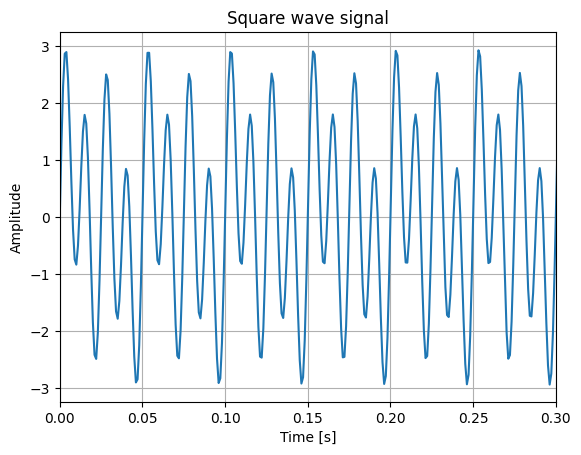

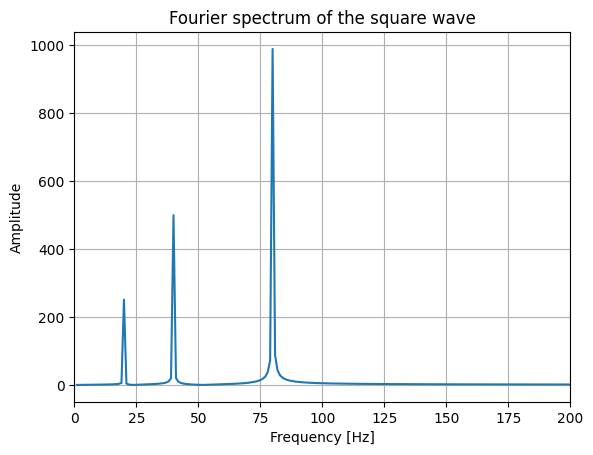

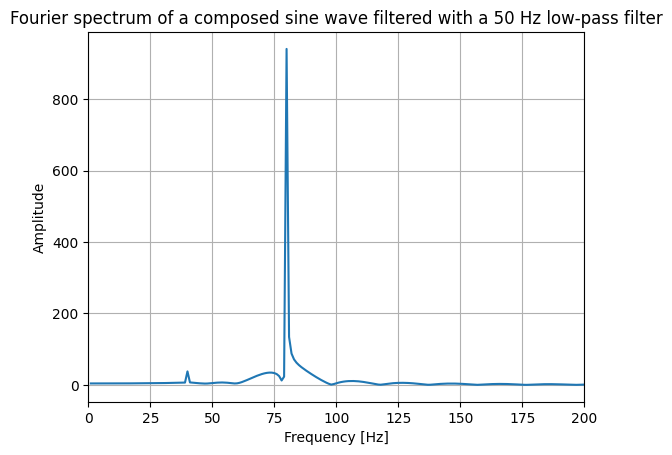

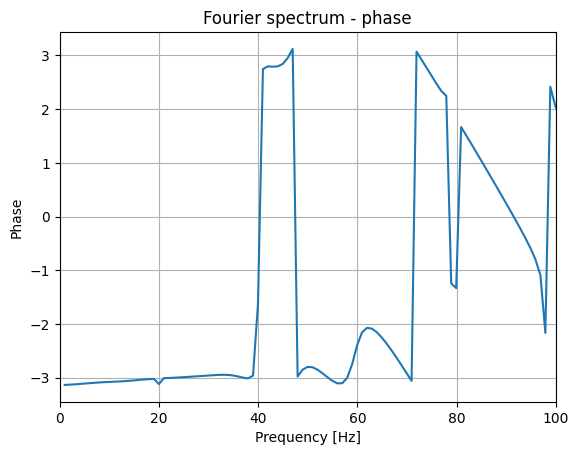

In [ ]:
from scipy.signal import firwin, lfilter

# Choose the sampling frequency and the fundamental frequency of sine waves
fs= 1000
f1 = 20
f2 = 80
f3 = 40

# Generate equally spaced time samples
t = np.linspace (0,1,fs)
# Create a composed sine wave
signal = 0.5*np.sin (2*np.pi* f1 * t) + 2*np.sin (2* np.pi* f2 * t) + np.sin (2* np.pi * f3 * t)

cutoff = 50                         # Choose the cutoff frequency of the filter (Hz)
num_taps = 101                       # Coefficient number of the filter -> it defines the filter quality
hp_filter = firwin ( num_taps, cutoff, fs = fs, pass_zero = False )    # Design the filter with cutoff frequency
filtered_signal = lfilter (hp_filter, 1.0, signal)              # Apply the low pass filter at the signal; 1.0 means no feedback (FIR filter)

# Time-domain plot of the square wave
plt.plot(t, signal)
plt.title('Square wave signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim (0,0.3)
plt.grid()
plt.show()

# Apply the Fourier Transform
amplitude = np.fft.fft(signal)
frequency = np.fft.fftfreq(len(t), d=(t[1] - t[0]))
positive_freq = frequency > 0
phase = np.angle(amplitude)

# Amplitude spectrum of the square wave
plt.plot(frequency[positive_freq], np.abs(amplitude)[positive_freq])
plt.title('Fourier spectrum of the square wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, 200)
plt.grid()
plt.show()

# Apply the Fourier Transform to the filtered signal
amplitude = np.fft.fft(filtered_signal)
frequency = np.fft.fftfreq(len(t), d=(t[1] - t[0]))
positive_freq = frequency > 0
phase = np.angle(amplitude)

# Amplitude filtered plot
plt.plot (frequency [ positive_freq ], np.abs (amplitude)[positive_freq])
plt.title ('Fourier spectrum of a composed sine wave filtered with a 50 Hz low-pass filter')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Amplitude')
plt.xlim (0,200)
plt.grid()
plt.show()

# Phase filtered plot
plt.plot (frequency [ positive_freq ], phase [positive_freq])
plt.title ('Fourier spectrum - phase')
plt.xlabel ('Prequency [Hz]')
plt.ylabel ('Phase')
plt.xlim (0,100)
plt.grid()
plt.show()

#Exercise 12: High pass filter
**A High-pass filter** is the complement of the low-pass filter. It passes signals with frequencies higher than the selected cutoff frequency and attenuates signals with lower frequencies.
High-pass filters are useful in many practical scenarios, such as:

- Removing slow drifts or baseline wander in measurement systems.

- Eliminating low-frequency hums in audio signals.

- Isolating high-frequency vibrations in mechanical or structural analysis.


In this exercise we filter the spectrum of a 10 Hz square wave with a 60 Hz high-pass filter. We notice that all the harmonics under 60 Hz are eliminated, while those over the cutoff remain unchanged.

The phase spectrum may also show changes, as filters can introduce a phase shift in the preserved frequencies.

Important: Choosing the right cutoff frequency is crucial. If it is too high, you may unintentionally remove useful signal components; if too low, low-frequency noise may still be present.


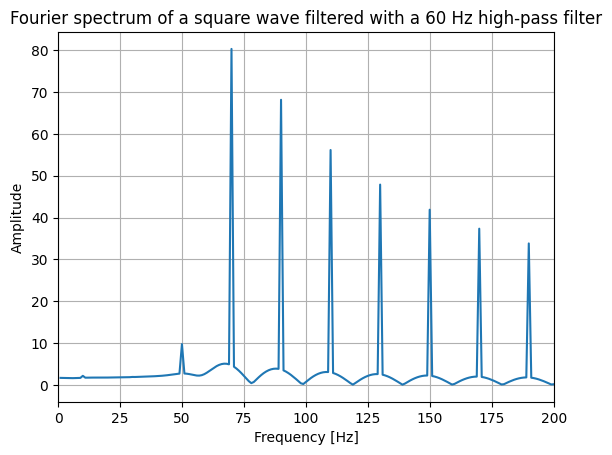

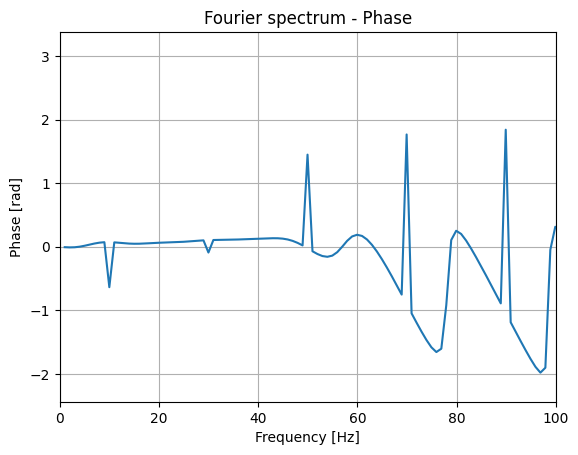

In [ ]:
from scipy import signal
from scipy.signal import firwin, lfilter
import numpy as np
import matplotlib.pyplot as plt
# Choose the parameter d (duty cycle), f (frequency) and fs (sampling frequency)
fs = 1000
f = 10
d = 0.5
# Generate equally spaced time samples
t = np.linspace(0, 1, fs)
# Create a square wave
signal = signal.square(2 * np.pi * f * t, duty=d)

# High-pass filter parameters
cutoff = 60            # Cutoff frequency of the filter (Hz)
num_taps = 101         # Number of filter coefficients -> defines filtering quality
# Design the high-pass filter; fs is the sampling frequency
hp_filter = firwin(num_taps, cutoff, fs=fs, pass_zero=False)
# Apply the high-pass filter to the signal; 1.0 means no feedback (FIR filter)
filtered_signal = lfilter(hp_filter, 1.0, signal)

# Apply the Fourier Transform
amplitude = np.fft.fft(filtered_signal)
frequency = np.fft.fftfreq(len(t), d=(t[1] - t[0]))
positive_freq = frequency > 0
phase = np.angle(amplitude)

# Amplitude spectrum plot
plt.plot(frequency[positive_freq], np.abs(amplitude)[positive_freq])
plt.title('Fourier spectrum of a square wave filtered with a 60 Hz high-pass filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, 200)
plt.grid()
plt.show()
# The plot shows peaks at 10, 30, 50 Hz. Components at 70, 90 Hz and higher are filtered out.

# Phase spectrum plot
plt.plot(frequency[positive_freq], phase[positive_freq])
plt.title('Fourier spectrum - Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.xlim(0, 100)
plt.grid()
plt.show()

# Exercise 13: Band-pass filter
Finally, we experiment with a **band-pass filter**, which is a device that passes frequencies within a certain range and attenuates frequencies outside the range. We need to choose a lower and an upper cutoff frequency.

We filter a square wave with a frequency of 10 Hz using a 20-80 Hz band-pass filter. The unfiltered signal shows peaks at the odd harmonics: 10, 30, 50, 70, 90 ... Hz. After using the filter only the peaks within the range remain, so we notice peaks at 30, 50 and 70 Hz.

This filter is useful if we need to focus our attention on a specific range of frequencies, for example to isolate certain components of a signal while ignoring others.

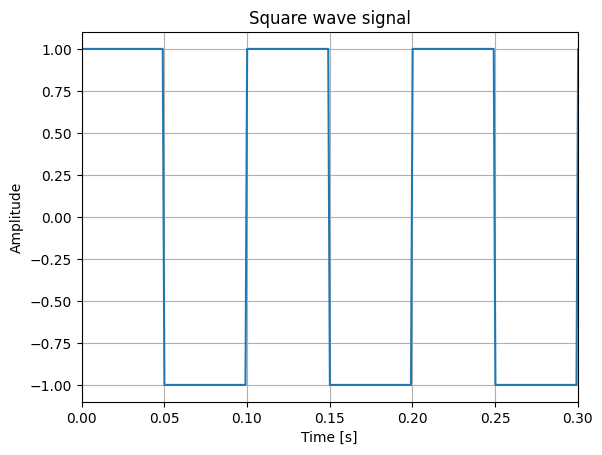

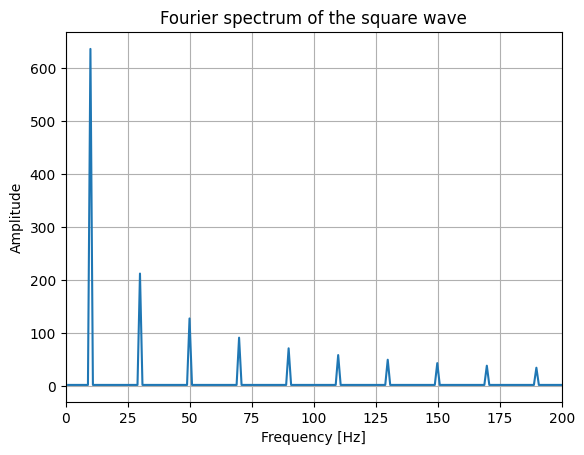

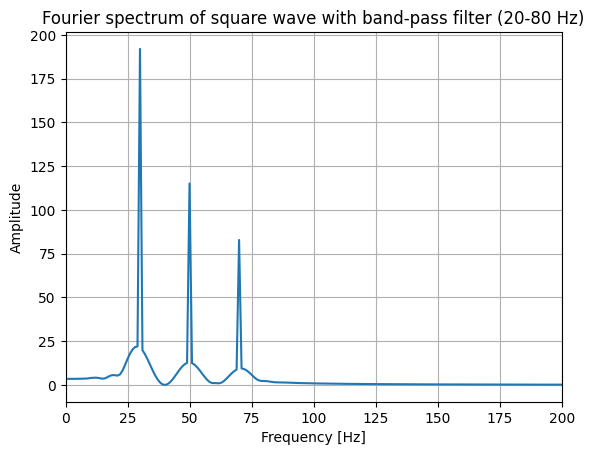

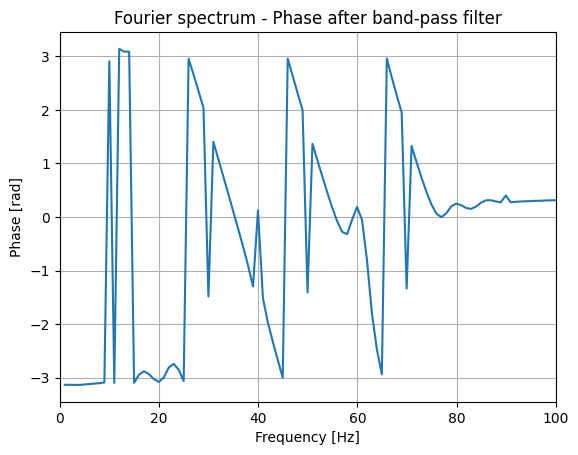

In [ ]:
from scipy import signal
from scipy.signal import firwin, lfilter
import numpy as np
import matplotlib.pyplot as plt
# Choose sampling frequency, square wave frequency and duty cycle
fs = 1000
f = 10
d = 0.5

# Generate equally spaced time samples
t = np.linspace(0, 1, fs)
# Create a square wave
signal = signal.square(2 * np.pi * f * t, duty=d)

# Time-domain plot of the square wave
plt.plot(t, signal)
plt.title('Square wave signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0,0.3)
plt.grid()
plt.show()

# Apply the Fourier Transform
amplitude = np.fft.fft(signal)
frequency = np.fft.fftfreq(len(t), d=(t[1] - t[0]))
positive_freq = frequency > 0
phase = np.angle(amplitude)

# Amplitude spectrum of the square wave
plt.plot(frequency[positive_freq], np.abs(amplitude)[positive_freq])
plt.title('Fourier spectrum of the square wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, 200)
plt.grid()
plt.show()

# Band-pass filter parameters
highpass = 20     # Lower cutoff frequency (Hz)
lowpass = 80      # Upper cutoff frequency (Hz)
num_taps = 201    # Number of filter coefficients -> defines filtering quality
# Design the band-pass filter; fs is the sampling frequency
hp_filter = firwin(num_taps, [highpass, lowpass], fs=fs, pass_zero=False)
# Apply the band-pass filter to the signal; 1.0 means no feedback (FIR filter)
filtered_signal = lfilter(hp_filter, 1.0, signal)

# Apply the Fourier Transform to the filtered signal
amplitude = np.fft.fft(filtered_signal)
frequency = np.fft.fftfreq(len(t), d=(t[1] - t[0]))
positive_freq = frequency > 0
phase = np.angle(amplitude)

# Amplitude spectrum after band-pass filtering
plt.plot(frequency[positive_freq], np.abs(amplitude)[positive_freq])
plt.title('Fourier spectrum of square wave with band-pass filter (20-80 Hz)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, 200)
plt.grid()
plt.show()
# We can see peaks at 30 and 50 Hz; components at 10 Hz, 70 Hz, 90 Hz and higher are filtered out.

# Phase spectrum after band-pass filtering
plt.plot(frequency[positive_freq], phase[positive_freq])
plt.title('Fourier spectrum - Phase after band-pass filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.xlim(0, 100)
plt.grid()
plt.show()